<h1 style='color: orange' align="center">Лабораторная работа №1</h1>

<p> <b>Студент:</b> Ивенкова Л.В.<br> 
    <b>Группа:</b> М8О-208Б-19<br> 
    <b>Преподаватель:</b> Гавриш О.Н.</p>    <b>Комментарии проверяющего:</b> Проверка периодичности: не до конца верно. Не во всех случаях выдаст правильный результат ваш метод.</p>

<h2 align="center">Часть 1 - Квадратик</h2>

<b>Задание:</b> при помощи функции отображения графиков отобразить квадратик.
Задав квадратик матрицей координат, повернуть и сдвинуть его относительно исходного положения.
Вывести исходный квадратик и результат.

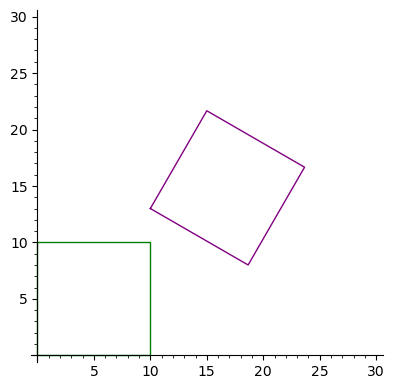

In [1]:
a = 10 #сторона квадрата
alpha = math.radians(30)

v = matrix([             # матрица координат
    [0,0], [0,a],
    [a,a], [a,0],
    [0,0]
])

matrix_rotate = matrix([        # матрица поворота
    [cos(alpha), -sin(alpha)],
    [sin(alpha), cos(alpha)]
])

matrix_move = matrix([             # матрица перемещения
    [10,13], [10,13],
    [10,13], [10,13],
    [10,13]
])


v_new = v * matrix_rotate + matrix_move

show(line(v, color='green') + line(v_new, color='purple'), xmin=0, xmax=30, ymin=0, ymax=30, aspect_ratio=1)

<h2 align="center">Часть 2 - Исследование функции</h2>

Для заданной формулой функции найти:
<ol>
    <li>Область определения функции.</li>
    <li>Является ли функция четной или нечетной, является ли периодической.</li>
    <li>Точки пересечения графика с осями координат.</li>
    <li>Промежутки знакопостоянства.</li>
    <li>Промежутки возрастания и убывания.</li>
    <li>Точки экстремума и значения в этих точках.</li>
    <li>Непрерывность. Наличие точек разрыва и их классификация.</li>
    <li>Асимптоты.</li>
</ol>
Построить график функции, асимптоты, промежутки знакопостоянства.<br>

<b>Вариант</b> 3.

<b>Функция:</b> $\frac{1}{2} \times \ln{\bigg( \frac{\sqrt{x^2 + 1}}{\sqrt{x^2 - 1}}\bigg)} - 15\times x^2$

In [2]:
y(x) = 1/2 * ln(sqrt(x**2 + 1) / sqrt(x**2 - 1)) - 15*x**2
show(y)

x |--> -15*x^2 + 1/2*log(sqrt(x^2 + 1)/sqrt(x^2 - 1))

<h2>1. Область определения функции.</h2>

Для функции $y(x)$ есть четыре условия:
<ol>
    <li>Подкоренное выражение в числителе $(x^2 + 1) \neq 0$</li>
    <li>Подкоренное выражение в знаменателе $(x^2 - 1) \neq 0$</li>
    <li>Знаменатель $\sqrt{x^2 - 1} \neq 0$</li>
    <li>Выражение под логарифмом $ \frac{\sqrt{x^2 + 1}}{\sqrt{x^2 - 1}} > 0$</li>
</ol>

Первое условие выполняется всегда.  
Условие 3 фактически повторяет условие 2.  
Так как значиние корня всегда $> 0$, то условие 4 выполняется всегда, когда выполняются условия 1-3.  
Следовательно, мы можем рассматривать лишь условие 2.

In [3]:
conditional = x**2 - 1 > 0

Решим это неравенство:

In [4]:
D = solve(conditional, x)
show("Область определения D = ",D)

'Область определения D = ' [[x < -1], [x > 1]]

Построим график функции:

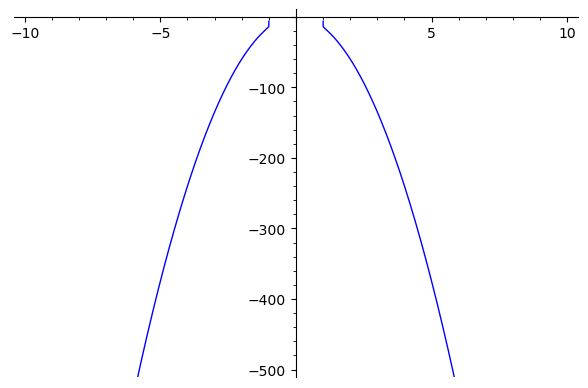

In [5]:
func = plot(y,(x,-10,-1-1e-15), ymin = -500, ymax = 1)
func += plot(y,(x,1+1e-15,10), ymin = -500, ymax = 1)
func.show()

<h2>2. Является ли функция чётной или нечётной, является ли периодической.</h2>

Из графика видно, что наша функция симметрична относительно оси OY, и несимметрична относительно начала координат (то есть она чётна и не нечётна). Также можно увидеть, что эта функция не периодична.  
Проверим это с помощью вычислений:  

а) Проверим, является ли наша функция чётной:

In [6]:
y(x) - y(-x)

0

б) Проверим, является ли наша функция нечётной:

In [7]:
y(x) + y(-x)

-30*x^2 + log(sqrt(x^2 + 1)/sqrt(x^2 - 1))

в) Проверим периодичность нашей функции:

In [8]:
var('T')
periodicity = solve((y(x) - y(x + T))==0, T)
for i in periodicity:
    show(i.expand().simplify_full())

T == -x - 1/30*sqrt(900*x^2 + 30*log(sqrt(T^2 + 2*T*x + x^2 + 1)/sqrt(T^2 + 2*T*x + x^2 - 1)) - 30*log(sqrt(x^2 + 1)/sqrt(x^2 - 1)))

T == -x + 1/30*sqrt(900*x^2 + 30*log(sqrt(T^2 + 2*T*x + x^2 + 1)/sqrt(T^2 + 2*T*x + x^2 - 1)) - 30*log(sqrt(x^2 + 1)/sqrt(x^2 - 1)))

Явных решений нет, Т находится по обе стороны уравнения, следовательно функция не является периодической.

Как мы видим, вычисления подтвердили наши наблюдения.

<h2>3. Точки пересечения графика с осями координат.</h2>

Так как из ОДЗ $x \neq 0$, то очевидно, что график не будет пересекать ось OY.  
Следовательно, нам надо лишь найти, при каких $x$ $y(x) = 0$ ($y$ пересечёт ось OX).

In [9]:
intersection = solve(y==0, x)
for i in intersection:
    show(i)

x == -sqrt(1/30)*sqrt(log(sqrt(x^2 + 1)/sqrt(x^2 - 1)))

x == sqrt(1/30)*sqrt(log(sqrt(x^2 + 1)/sqrt(x^2 - 1)))

Получается, функция не имеет пересечения с осью OX в действительном поле.

<h2>4. Промежутки знакопостоянства.</h2>

По графику можно увидеть, что весь график функции лежит ниже оси OX.  
Действительно, рассмотрим значения функции слева и справа от ОДЗ:

In [10]:
y(-1 - 0.1)

-17.5615899340514

In [11]:
y(1 + 0.1)

-17.5615899340514

Видим, что и слева, и справа от ОДЗ функция принимает отрицательные значения.

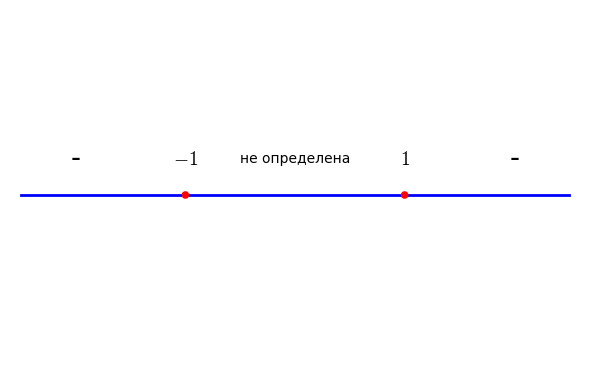

In [12]:
# отрисовка отрезка - основная линия для графика промежутков знакопостоянства
intervals_of_constancy = plot(0, xmin=-2.5, xmax=2.5, ymin=-0.5, ymax=0.5, thickness = 2)

# добавление красных маркеров - отметки точек\маркеров
intervals_of_constancy  += point((-1, 0), color="red", size=30, zorder=10)
intervals_of_constancy  += point((1, 0), color="red", size=30,  zorder=10)

# здесь добавляем подписи точек (значения по оси X)
intervals_of_constancy  += text("$-1$", (-1, 0.1), color="black", fontsize=14)
intervals_of_constancy  += text("$1$", (1, 0.1), color="black", fontsize=14)

# Здесь добавляем подписи знаков промежутков знакопостоянства
y_margin = 0.1  # смещение по оси Y элемента подписи, чтобы он не наслаивался на линию
intervals_of_constancy  += text("-", (-2 , y_margin), color="black", fontsize=20) 
intervals_of_constancy  += text("не определена", (0 , y_margin), color="black", fontsize=10)
intervals_of_constancy  += text("-", (2 , y_margin), color="black", fontsize=20)

# оси не нужны - скрываем
intervals_of_constancy.show(axes=False)

<h2>5. Промежутки возрастания и убывания.</h2>

Найдем производную и её интервалы знакопостоянства. Для этого сначала найдём точки, в которых производная равна 0.

In [13]:
dif = y.diff().expand().simplify_full()
show(dif)

-(30*x^5 - 29*x)/(x^4 - 1)

In [14]:
show(solve(dif==0, x))

[x == 1/30*I*30^(3/4)*29^(1/4), x == -1/30*30^(3/4)*29^(1/4), x == -1/30*I*30^(3/4)*29^(1/4), x == 1/30*30^(3/4)*29^(1/4), x == 0]

Данное уравнение имеет явный корень $x = 0$, плюс 2 действительных корня и 2 комплексных. Но эти значения (действительные) не входят в наше ОДЗ (все они лежат в промежутке $[-1, 1]$), значит эти корни не подходят, и производная никогда не станет равна 0.  


Однако мы можем проследить, как она ведёт себя справа и слева от этих точек (а точнее от промежутка $[-1, 1]$).

In [15]:
dif(0 - 2)

902/15

In [16]:
dif(0 + 2)

-902/15

Как мы видим, слева от найденных корней производная положительная, значит там функция возрастает.  
Справа же производная отрицательная, значит там функция убывает.  
Получаем: функция возрастает при $x \in (-\infty; -1)$ и убывает при $x \in (1; \infty)$

<h2>6. Точки экстремума и значения в этих точках.</h2>

Точки экстремума достигаются там, где производная функции равна 0. Мы уже решали нужное для этого уравнение выше, и нашли лишь корни, не вхоядщие в ОДЗ.  
Следовательно, у этой функции нет экстремумов на области определения.

<h2>7. Непрерывность. Наличие точек разрыва и их классификация.</h2>

Чтобы определить вид разрыва функции, надо найти левый и правый пределы в точках разрыва функции. Мы будем находить эти пределы на концах отрезка $[-1, 1]$.

In [17]:
limit(y(x), x=-(-1))

+Infinity

In [18]:
limit(y(x), x=+(-1))

+Infinity

In [19]:
limit(y(x), x=+1)

+Infinity

In [20]:
limit(y(x), x=-1)

+Infinity

Как мы видим, в обоих точках 1 и -1 хотя бы один из односторонних пределов ревен бесконечности. Значит они обе - точки разрыва второго рода.
Итог: 1 и -1 - точки разрыва второго рода.  
И так как функция имеет точки разрыва, то следовательно, он не непрерывна на своей области определения.

<h2>8. Асимптоты.</h2>

а) Если в точке $\alpha$  функция  терпит бесконечный разрыв,  то прямая, заданная уравнением $x = \alpha$ является вертикальной асимптотой графика.  
У нас функция терпит бесконечный разрыв в точках 1 и -1. Следовательно это вертикальные асимптоты.

б) Наклонные асимтоты обычно ищут в виде $y = kx + b$ 

   Находим коэффициент k: $\lim_{x\to \infty} (y(x)/x) = 0$:
    

In [21]:
limit(y(x)/x, x=infinity)

-Infinity

Раз предел равен бесконечности, то получается, что наклонных асимптот у функции нет.

Построим график и его асимптоты:

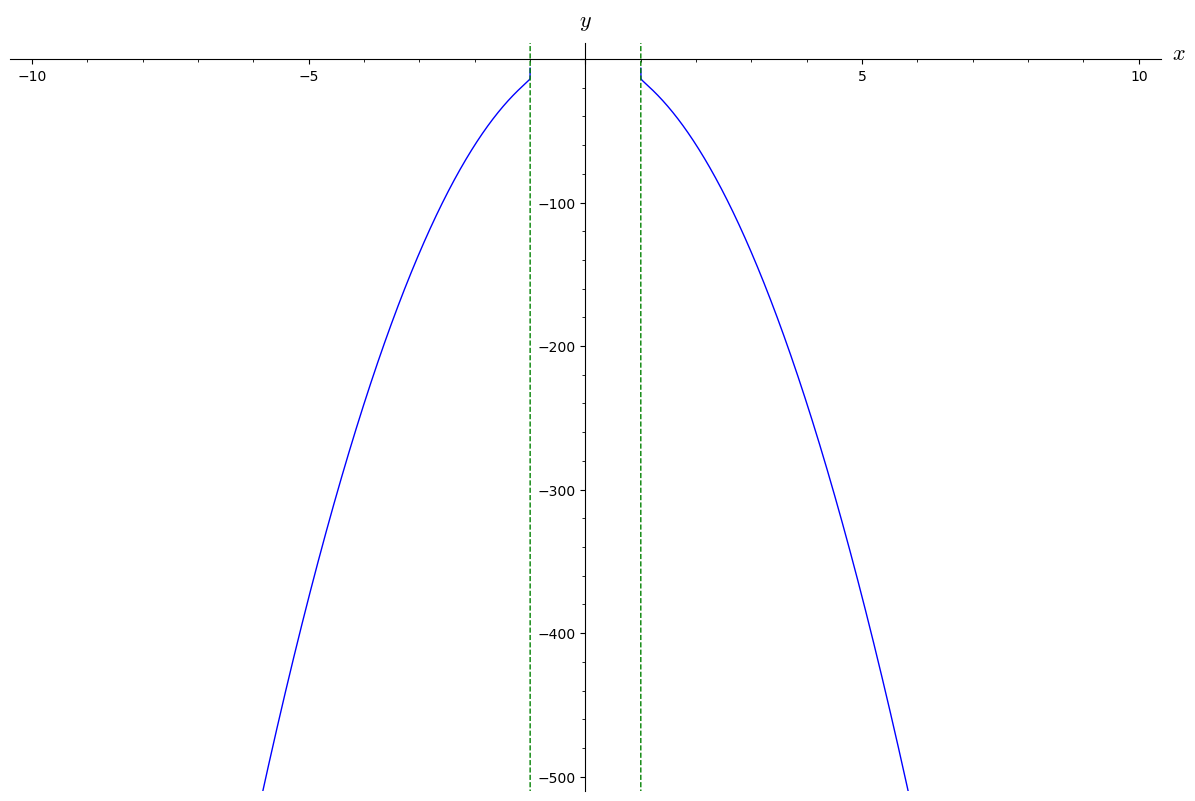

In [22]:
func = plot(y,(x,-10,-1-1e-15), ymin = -500, ymax = 1)
func += plot(y,(x,1+1e-15,10), ymin = -500, ymax = 1)
asympt1 = line([(1,x) for x in srange(-1100,100,0.1)], color='green', linestyle="dashed")
asympt2 = line([(-1,x) for x in srange(-1100,100,0.1)], color='green', linestyle="dashed")
show(func + asympt1 + asympt2, figsize=12, axes_labels=['$x$','$y$'])